# Wine Project

## Project Description
We are part of a data science team using the wine data set to develop a machine learning model that will help to predict the quality of wines. 

## Project Goals
- To discover drivers of quality of wine
- Use the drivers to develop a ML program that predicts the quality of wine
- Deliver a report to a data science team

In [1]:
import functions as f
import prepare as p

## Acquire

- data gathered from the Wine dataset from DataWorld
- each row represents a wine
- each column represents a feature of the wine
- the data gathered from the database started at 55,502 rows and 7 columns

## Prepare

### Prepare Actions:

- Removed columns that did not contain useful information
- Checked that column data types were appropriate
- Split data into train, validate and test (approx. 60/20/20), stratifying on 'quality'

## Data Dictionary
|Target Variable | Definition|
|-----------------|-----------|
| quality | The quality of the wine |

| Feature  | Definition |
|----------|------------|
| fixed acidity |  The total amount of acids of the wine (g/L) |
| volatile acidity |  The amount of organic acids that can be extracted through distillation (g/L) |
| citric acid |  The amount of citric acid in the wine (g/mL) |
| sugar |  The amount of sugar in the wine (g) |
| chlorides | The amount of chloride and sodium in the wine (mg/mL) |
| fso2 | The amount of Free Sulfur Dioxide in the wine (PPM) |
| tso2 | The total amount of Sulfur Dioxide in the wine (PPM) |
| density | g/mL of the wine |
| pH | pH level of the wine |
| alcohol | Alcohol percentage in the wine |
| type | Red or white wine | 

In [2]:
# acquring and cleaning the data
wine = f.wrangle_wine()

# splitting the data into train, validate and test
train, val, test = p.train_val_test(wine, stratify='quality')

# taking a quick look at the data
train.head()

,fixed,volatile,citric,sugar,chlorides,fso2,tso2,density,pH,alcohol,quality,type
3498,6.4,0.30,0.36,2.00,0.052,18.0,141.0,0.99273,3.38,10.5,6,white
2089,7.9,0.17,0.32,1.60,0.053,47.0,150.0,0.99480,3.29,9.6,6,white
4934,7.8,0.60,0.14,2.40,0.086,3.0,15.0,0.99750,3.42,10.8,6,red
446,5.8,0.28,0.27,2.60,0.054,30.0,156.0,0.99140,3.53,12.4,5,white
3392,6.7,0.38,0.26,9.55,0.036,35.0,91.0,0.99190,2.98,12.4,6,white


## Does a higher content of Free Sulfer Dioxide lead to a higher quality wine?

**Ho: The mean free sulfur dioxide content of wine with a quality 6 and higher is equal to the overall mean**  
**Ha: The mean free sulfur dioxide content of wine with a quality 6 and higher is greater than the overall mean**  
- determine if the free sulfur dioxide content is higher in higher quality wines
- confidence interval of 95%
- alpha of .05

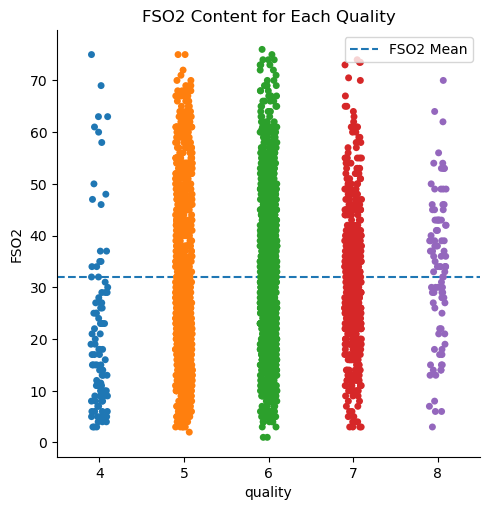

In [3]:
# visualization of free sulfur dioxide compared to quality using a cat plot
f.fso2_plot(train, 'fso2')

In [4]:
# one sample t-test to determine if the free sulfur dioxide is higher in higher quality wines
f.ttest(train, 'fso2', 'quality', 6)

We fail to reject the null.


### Takeaways:
- The stats test fails to reject the null therefore the average free sulfur dioxide content is equal across all wine qualities. 

## Do red wines have a lower content of Sulfur Dioxide compared to white wines?

**Ho: The mean total sulfur dioxide content of red wine equal to or greater the overall mean**  
**Ha: The mean total sulfur dioxide content of red wine lower than the overall mean**  
- determine if the property value and fips code are related
- confidence interval of 95%
- alpha of .05

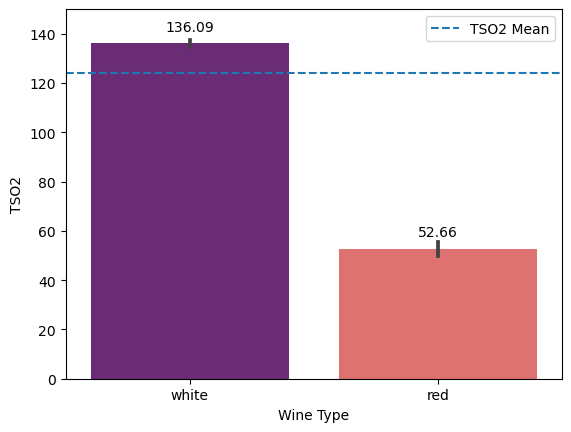

In [5]:
# visualization of total sulfur dioxide compared to type of wine using a bar plot
f.tso2_plot(train, 'tso2')

In [6]:
# one sample t-test to determine if the total sulfur dioxide is lower in red wines
f.ttest_type(wine, 'tso2', 'type', 'red')

We reject the null.


### Takeaways:
- The stats test rejects the null therefore the average total sulfur dioxide content in red wine is lower than the overall average.
- The graph makes it very clear that total sulfur dioxide content in red wine is lower than the overall.

## Do higher quality wines have a higher content of citric acid?

**Ho: The mean citric acid content of wine with a quality 6 and higher is equal or lower to the overall mean**  
**Ha: The mean citric acid content of wine with a quality 6 and higher is greater than the overall mean**   
- determine if the citric acid content is higher in higher quality wines
- confidence interval of 95%
- alpha of .05

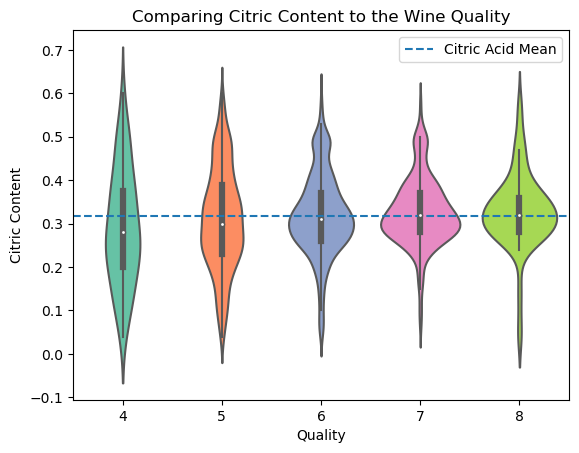

In [7]:
# visualization of citric acid content compared to quality using a violin plot
f.citric_plot(train, 'citric')

In [8]:
# one sample t-test to determine if the citric content is higher in higher quality wines
f.ttest(train, 'citric','quality',6)

We reject the null.


### Takeaways:
- The stats test reject the null therefore the average citric acid content is greater in higher wine qualities. 

## Does higher contents of total suflur dioxide lead to a higher pH level?
**Ho: pH level and total sulfur dioxide are independent.**  
**Ha: There is a relationship between pH level and total sulfur dioxide.**   
- determine if the citric acid content is higher in higher quality wines
- confidence interval of 95%
- alpha of .05

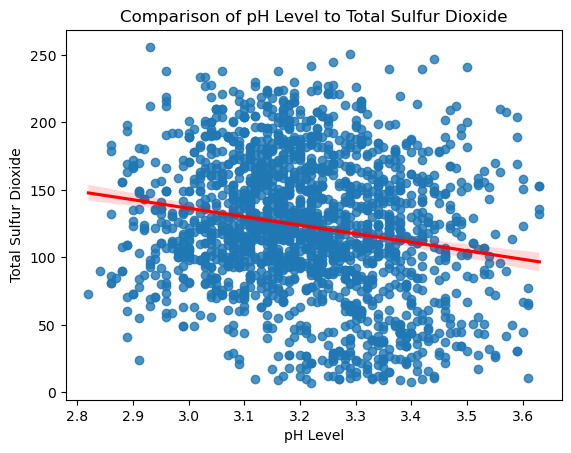

In [9]:
# visualization of pH and total sulfur dioxide 
f.so2_ph_plot(train, 'pH','tso2')

In [10]:
# pearsonr stats test to determine correlation between the two variables
f.pearson_test(train, 'pH','tso2')

We reject the null.
pH and tso2 have a correlation of -0.18905052487978016


### Takeways
- There exists a statistically significant relationship between pH level and total sulfur dioxide
- The graph shows a fairly noticeable downward slope in the regression line.

In [11]:
# splitting and scaling the data
X_train, y_train, X_val, y_val, X_test, y_test = f.split_scale(wine)

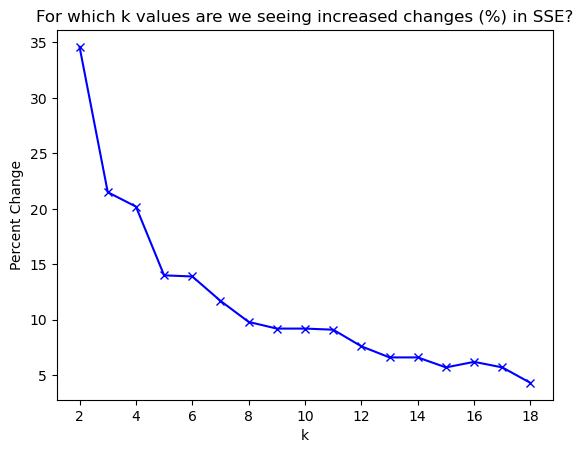

In [12]:
# determine best k for sulfur dioxide
f.find_k(X_train, ['fso2','tso2'], range(2,20))

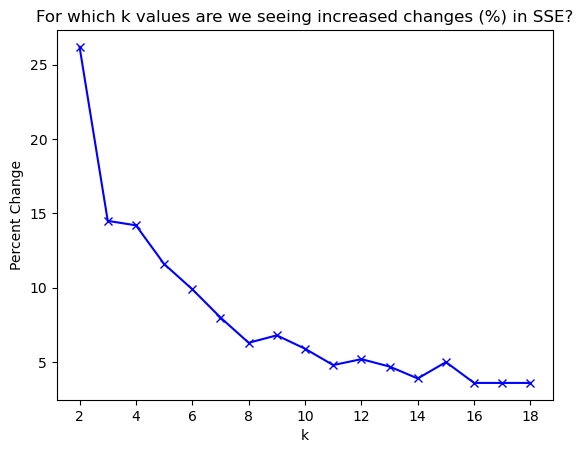

In [13]:
# determine best k for acidity
f.find_k(X_train, ['fixed', 'volatile', 'citric'], range(2,20))

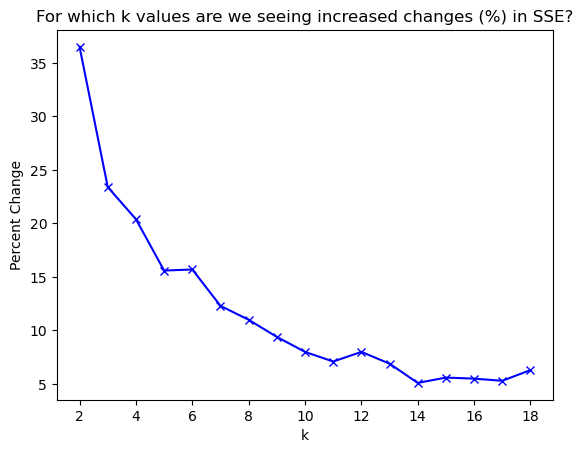

In [14]:
# determine best k for viscosity
f.find_k(X_train, ['density', 'alcohol'], range(2,20))

In [15]:
# creating variable of all the X datasets
X = [X_train, X_val, X_test]

In [16]:
# creating 3 groups of clusters
X = f.cluster_so2(X)
X = f.cluster_acids(X)
X = f.cluster_visc(X)

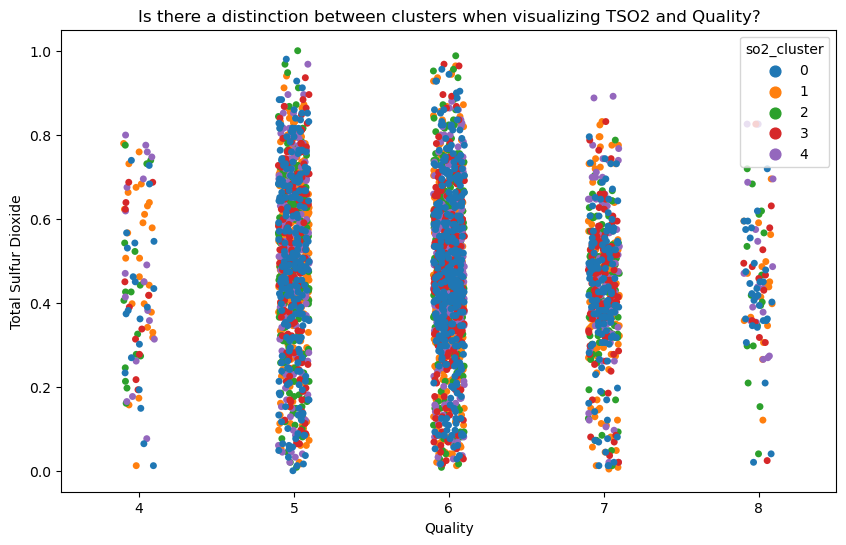

In [20]:
# plotting to determine if the suflur dioxide clusters were noticeable when visualizing by quality
f.tso2_cluster_plot(X, y_train, 'tso2', 'so2_cluster')

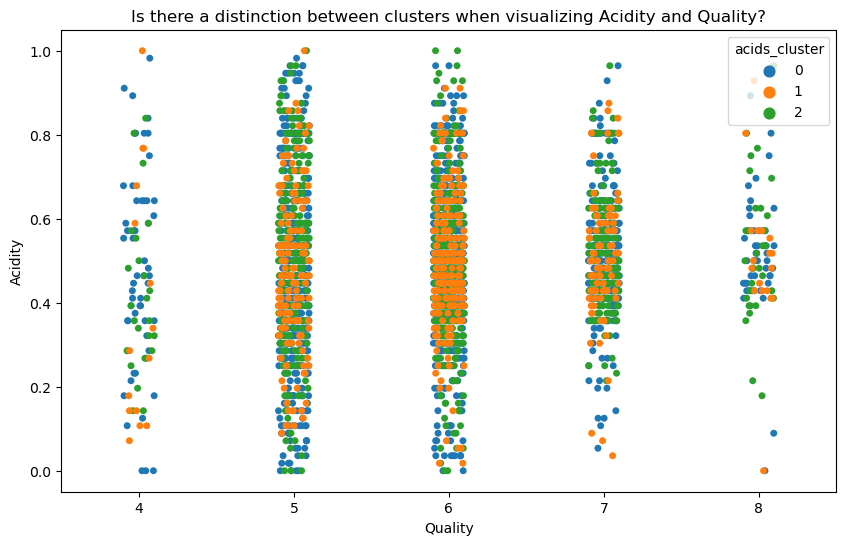

In [22]:
# plotting to deterimine if the acidity cluster it noticeable when visualizing with quality
f.acid_cluster_plot(X, y_train, 'citric','acids_cluster')

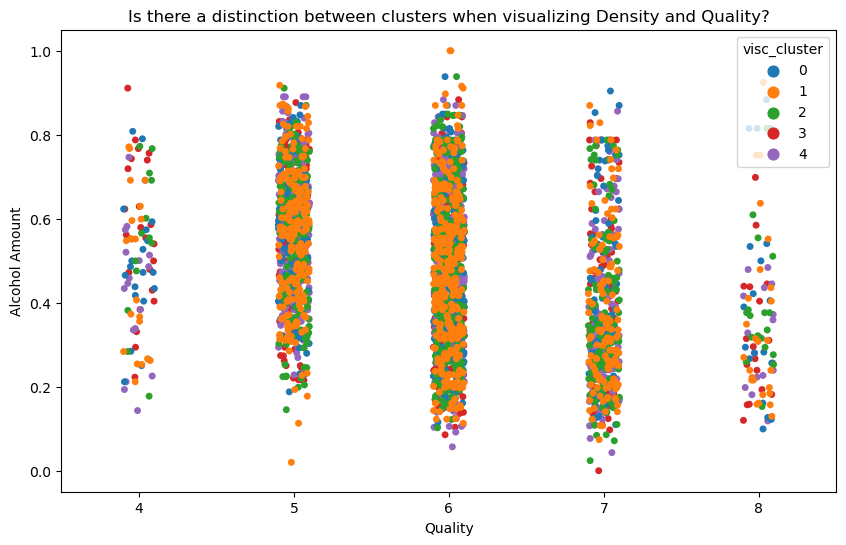

In [23]:
# plotting to determine if the viscosity cluster is noticeable when visualizing with quality
f.visc_cluster_plot(X, y_train, 'density','visc_cluster')

### Takeways:
- Clustering proved to not be helpful in determining quality.

## Exploration Summary
- The Free Sulfur Dioxide content is equal across all the qualities.
- The Total Sulfur Dioxide content is lower, on average, for red wines.
- The average Citric Acid content is higher among higher quality wines.
- pH level and Suflur Dioxide have a negative correlation and a statistically signficant relationship

## Features We Are Modeling With
- Fixed Acidity
- Volatile Acidity
- Citric Acid
- Sugar
- Chlorides
- Free Sulfur Dioxide
- Total Sulfur Dioxide
- Density
- Alcohol
- Type

## Features We Are Not Modeling With
- We are not modeling with the clusters we created
- The clusters we created had no significant benefit to move forward to modeling

# Modeling
- We will be using accuracy as the evaluation metric
- The baseline accuracy is .45